<a href="https://colab.research.google.com/github/ikukang/MLwithPython/blob/master/5_4_visualizing_what_convnets_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.5'

## Convnet의 학습 시각화
Convnet 모델에서 각 Convolutional Layer와 Pooling Layer가 출력하는 feature map을 layer 별로 시각화하여, 개별적인 layer가 입력을 어떻게 변경시키는지, 그리고 개별 filter가 어떤 의미인지 확인<br><br>

## (1) 각 Channel의 활성화 정도에 대하여 시각화
- CNN, Max Pooling Layer 등, 개별 Layer 각각의 Channel이 입력 image를 어떻게 변환하고 어느 부분을 활성화 시키는지 시각적으로 확인할 수 있는 예제 임

In [2]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
import os 
import shutil

base_dir = '/gdrive/My Drive/Colab Notebooks/datasets/cats_and_dogs_small'
base_root_dir = '/gdrive/My Drive/Colab Notebooks/datasets/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [4]:
cd /gdrive/My Drive/Colab Notebooks/datasets/

/gdrive/My Drive/Colab Notebooks/datasets


In [6]:
# 5.2 에서 저장했던 Convnet Model을 load
from keras.models import load_model

model = load_model('cats_and_dogs_small_2.h5')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

In [42]:
# training 시 사용하지 않았던 image 중 하나를 선택 (여기서는 1700번 cat을 선택)
img_path = './cats_and_dogs_small/test/cats/cat.1700.jpg'

from keras.preprocessing import image
import numpy as np

# 해당 image를 150 * 150 으로 크기 조정 후, 먼저 (150 * 150 * 3) 텐서로 변환
# 그 후 axis를 추가하여 (1 * 150 * 150 * 3) 으로 차원 변경
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)

# 255로 나누어 정규화(normalization)
img_tensor /= 255.

print(img_tensor.shape)

(1, 150, 150, 3)


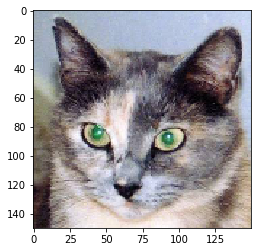

In [43]:
# 1700번 cat image
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [0]:
from keras import models

# Convnet 상위 8개 layer의 output을 추출
layer_outputs = [layer.output for layer in model.layers[:8]]

# 1개의 입력에 대해 8개 layer의 output을 출력하는 모델을 생성
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [0]:
# 입력 image tensor(1 * 150 * 150 * 3)에 대하여 predict metohd를 실행해서, 각 layer마다 하나씩 8개의 numpy array로 이루어진 list를 반환
activations = activation_model.predict(img_tensor)

In [46]:
# 각 layer에 대하여 shape을 확인하여 cats_and_dogs_small_2.h5 model의 layer와 동일함을 알 수 있음
for i in range(8):
    print(activations[i].shape)

(1, 148, 148, 32)
(1, 74, 74, 32)
(1, 72, 72, 64)
(1, 36, 36, 64)
(1, 34, 34, 128)
(1, 17, 17, 128)
(1, 15, 15, 128)
(1, 7, 7, 128)


In [47]:
# 첫번째 layer(1 * 148 * 148 * 32) 의  shape 확인
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


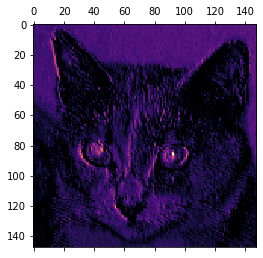

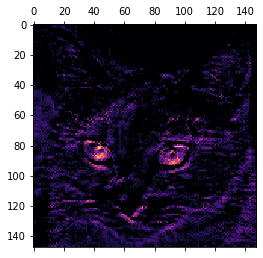

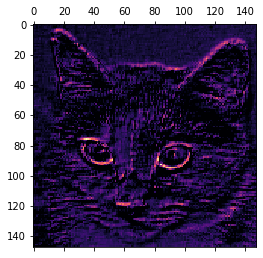

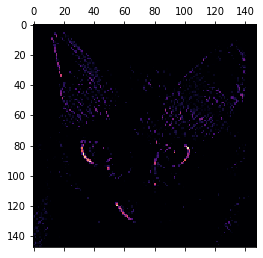

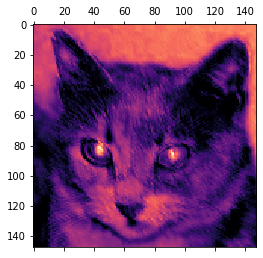

In [48]:
# 최초 Network에 주입하는 image는 (1 * 150 * 150 * 3) 텐서이고, 첫번째 Convolution Layer(conv2d_5) 통과 후, (1, 148, 148, 32) 텐서로 변환 됨
# 상기 내용에 대한 상세 설명은 '5.2-using-convnets-with-small-datasets'의 network 구성을 참조

# 아래는 15 ~ 19번째 channel에 해당하는 행렬(148 * 148)을 이미지로 변환(matshow)하여 display 하였음
for i in range(14, 19, 1):
    plt.matshow(first_layer_activation[0, :, :, i], cmap='magma')
plt.show()

# 첫번째 Convolutional Layer(conv2d_5) 15 ~ 19 channel에서는 cat의 눈이 밝게 활성화 된 것으로 보아, 눈을 감지하도록 encoding 된 것으로 예상 함

(1, 34, 34, 128)


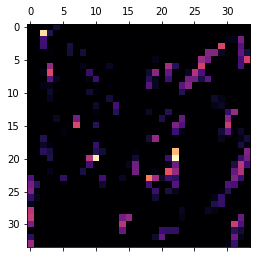

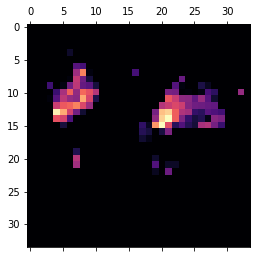

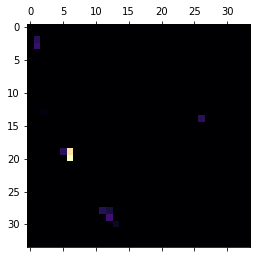

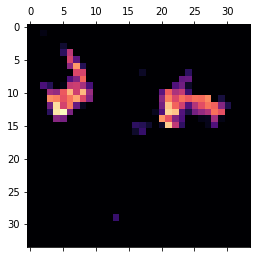

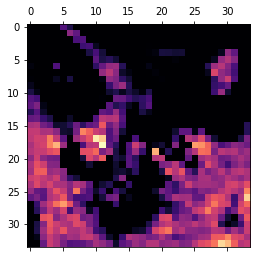

In [49]:
# 5번째 layer(1 * 34 * 34 * 128) 의  shape 확인
first_layer_activation = activations[4]
print(first_layer_activation.shape)

# 최초 Network에 주입하는 image는 (1 * 150 * 150 * 3) 텐서이고, 5번째 Convolution Layer(conv2d_6) 통과 후, (1, 34,34, 128) 텐서로 변환 됨
# 아래는 15 ~ 19번째 channel에 해당하는 행렬(34 * 34)을 이미지로 변환(matshow)하여 display 하였음
for i in range(14, 19, 1):
    plt.matshow(first_layer_activation[0, :, :, i], cmap='magma')
plt.show()

# image가 점점 추상화 되어 시각적으로 이해하기 어려워지나, 눈, 귀 와 같이 특정 부분에 대해서 밝게 활성화 되고 나머지는 검게 
# 비활성화 되고 있는 것으로 추측해 볼 수 있음

(1, 17, 17, 128)


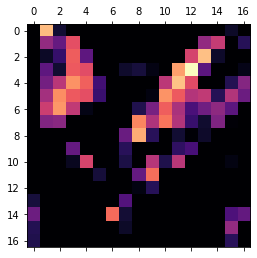

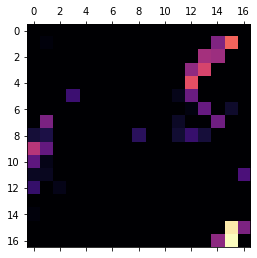

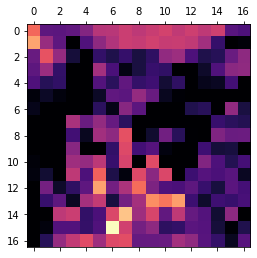

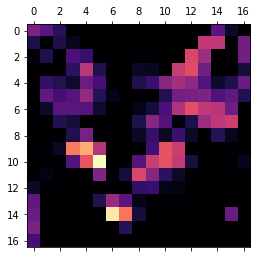

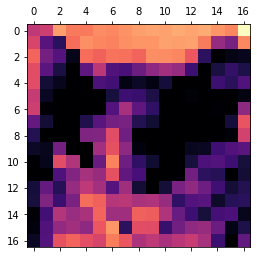

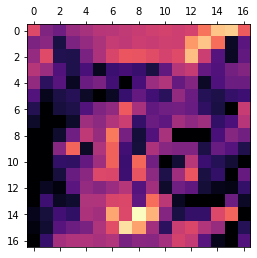

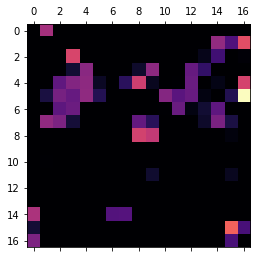

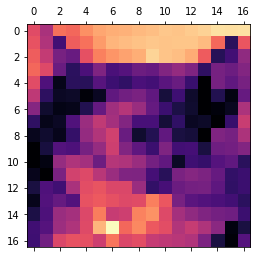

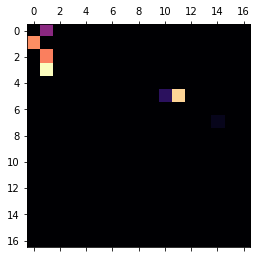

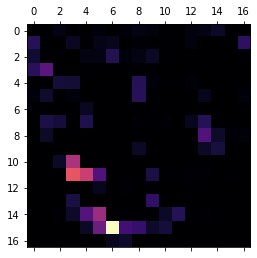

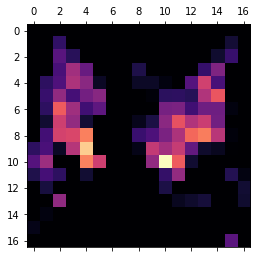

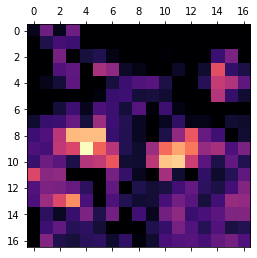

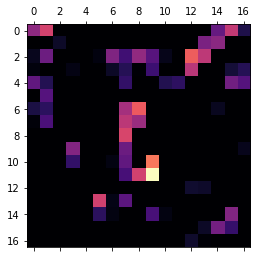

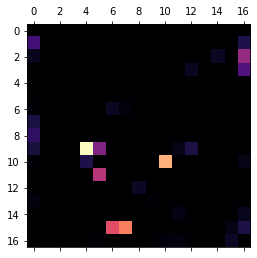

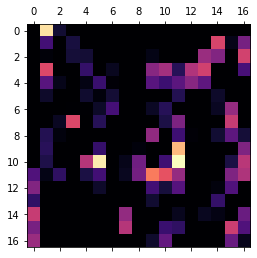

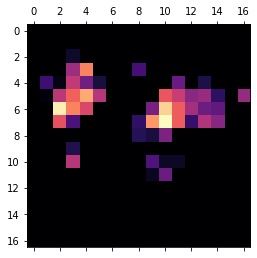

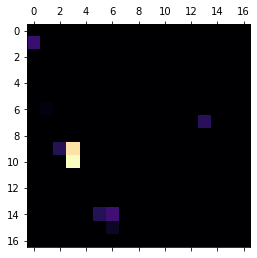

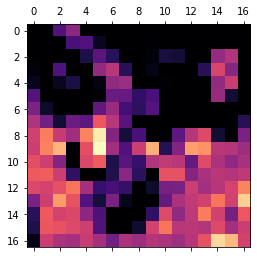

In [54]:
# 6번째 layer(1 * 34 * 34 * 128) 의  shape 확인
first_layer_activation = activations[5]
print(first_layer_activation.shape)

# 최초 Network에 주입하는 image는 (1 * 150 * 150 * 3) 텐서이고, 5번째 Convolution Layer(conv2d_6) 통과 후, (1, 34,34, 128) 텐서로 변환 됨
# 아래는 15 ~ 19번째 channel에 해당하는 행렬(34 * 34)을 이미지로 변환(matshow)하여 display 하였음
for i in range(0, 19, 1):
    plt.matshow(first_layer_activation[0, :, :, i], cmap='magma')
plt.show()

# image가 점점 추상화 되어 시각적으로 이해하기 어려워지나, 눈, 귀 와 같이 특정 부분에 대해서 밝게 활성화 되고 나머지는 검게 
# 비활성화 되고 있는 것으로 추측해 볼 수 있음

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


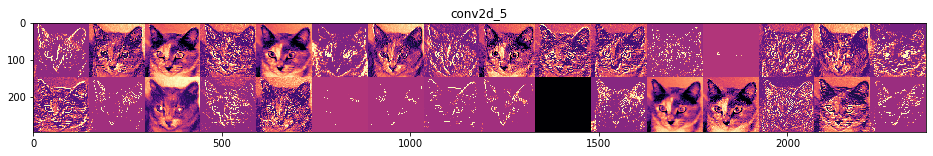

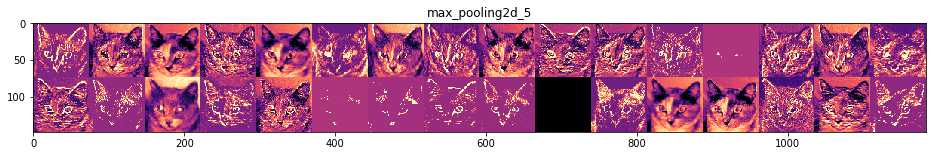

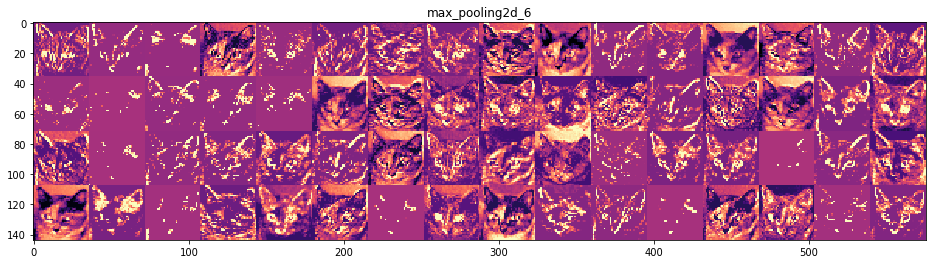

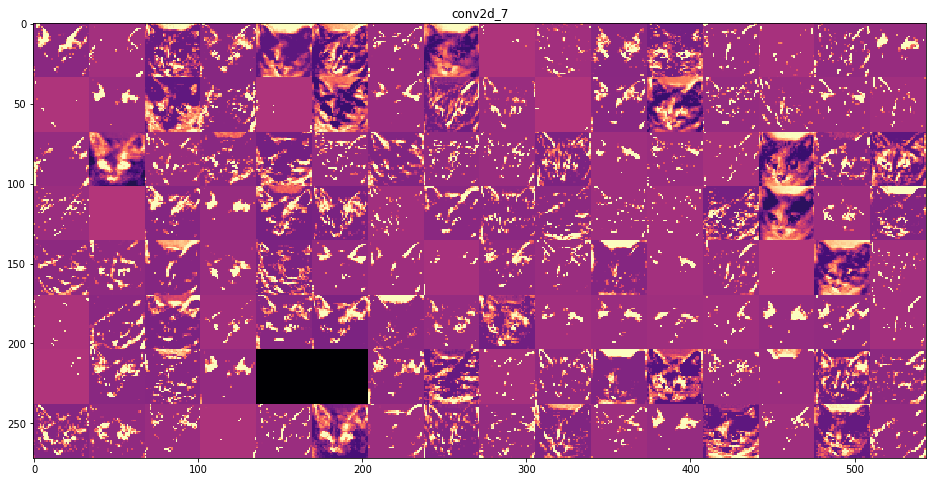

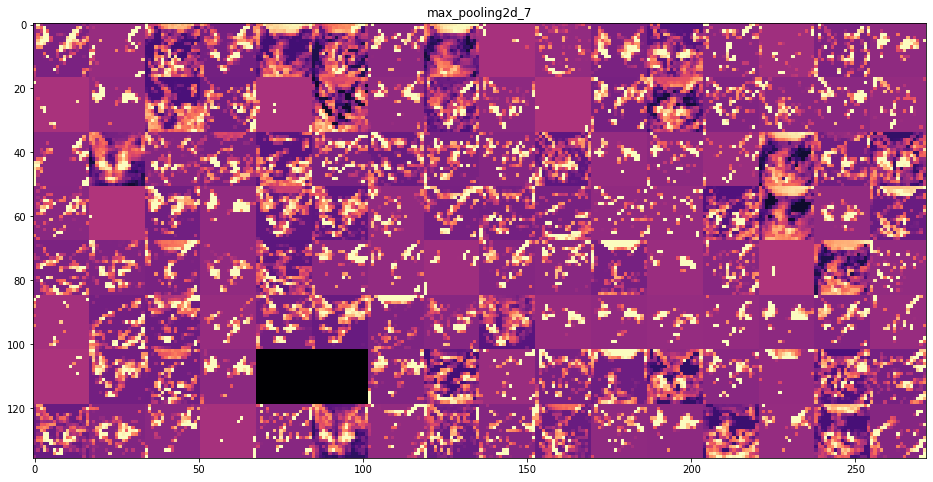

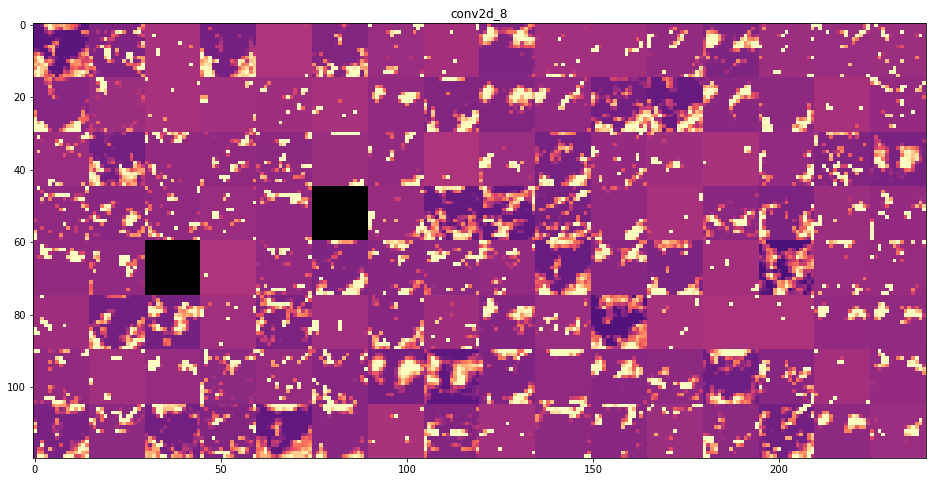

In [50]:
# layer_names는 각 Convnet Model의 각 layer 이름으로 명명
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# feature map 그리기
for layer_name, layer_activation in zip(layer_names, activations):
    # feature map의 channel 순서를 n_features 에 지정
    n_features = layer_activation.shape[-1]

    # 특성 맵의 크기 : (1, size, size, n_features)
    size = layer_activation.shape[1]

    # grid 크기
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # 각 feature를 하나의 grid에 채움
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :,col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # grid 출력
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='magma')

plt.show()

- 하위 Layer에서는 image에 있는 대부분의 정보가 유지되는 것 처럼 보이나, 상위 Layer로 갈수록 각 channel의 image는 추상적으로 바뀌어 가면서 시각적으로 이해하기 어려워 짐
- 상위 Layer로 가면서 활성화 되지 않은 channel이 존재 함, 이는 filter에 encoding 된 pattern이 입력 image에 나타나지 않는 경우가 있기 때문임을 알 수 있음

In [55]:
from keras.applications import VGG16
from keras import backend as K

model = VGG16(weights='imagenet',
              include_top=False)

layer_name = 'block3_conv1'
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

58892288/58889256 [==============================] - 1s 0us/step


In [0]:
# gradients 함수가 반환하는 텐서 리스트(여기에서는 크기가 1인 리스트)에서 첫 번째 텐서를 추출합니다
grads = K.gradients(loss, model.input)[0]

In [0]:
# 0 나눗셈을 방지하기 위해 1e–5을 더합니다
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

In [0]:
iterate = K.function([model.input], [loss, grads])

# 테스트:
import numpy as np
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

In [0]:
# 잡음이 섞인 회색 이미지로 시작합니다
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.

# 업데이트할 그래디언트의 크기
step = 1.
for i in range(40):   # 경사 상승법을 40회 실행합니다
    # 손실과 그래디언트를 계산합니다
    loss_value, grads_value = iterate([input_img_data])
    # 손실을 최대화하는 방향으로 입력 이미지를 수정합니다
    input_img_data += grads_value * step

In [0]:
def deprocess_image(x):
    # 텐서의 평균이 0, 표준 편차가 0.1이 되도록 정규화합니다
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # [0, 1]로 클리핑합니다
    x += 0.5
    x = np.clip(x, 0, 1)

    # RGB 배열로 변환합니다
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [0]:
def generate_pattern(layer_name, filter_index, size=150):
    # 주어진 층과 필터의 활성화를 최대화하기 위한 손실 함수를 정의합니다
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])

    # 손실에 대한 입력 이미지의 그래디언트를 계산합니다
    grads = K.gradients(loss, model.input)[0]

    # 그래디언트 정규화
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

    # 입력 이미지에 대한 손실과 그래디언트를 반환합니다
    iterate = K.function([model.input], [loss, grads])
    
    # 잡음이 섞인 회색 이미지로 시작합니다
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.

    # 경사 상승법을 40 단계 실행합니다
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        
    img = input_img_data[0]
    return deprocess_image(img)

In [62]:
plt.imshow(generate_pattern('block3_conv1', 0))
plt.show()

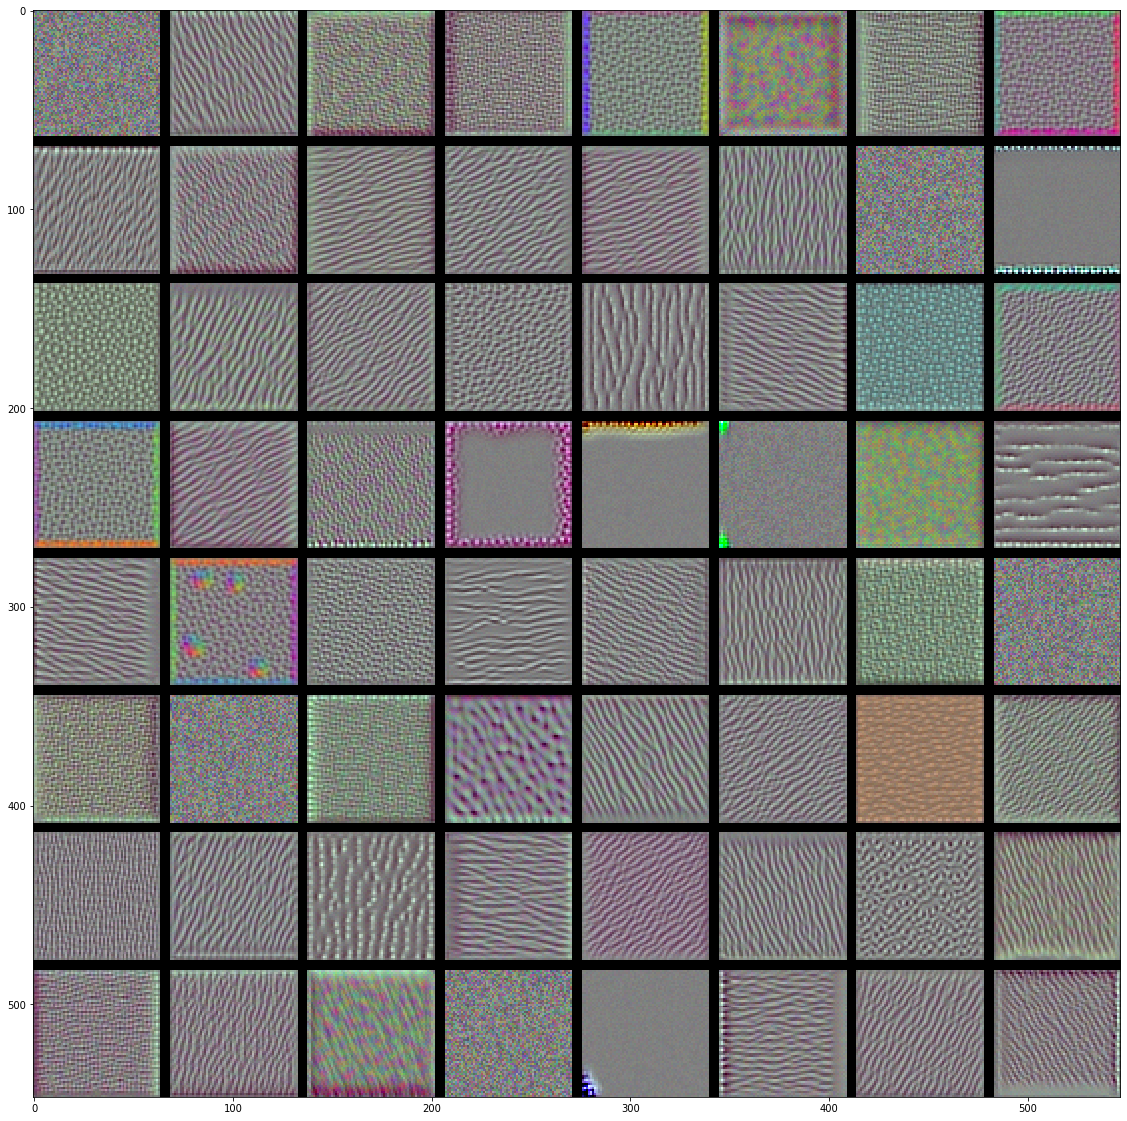

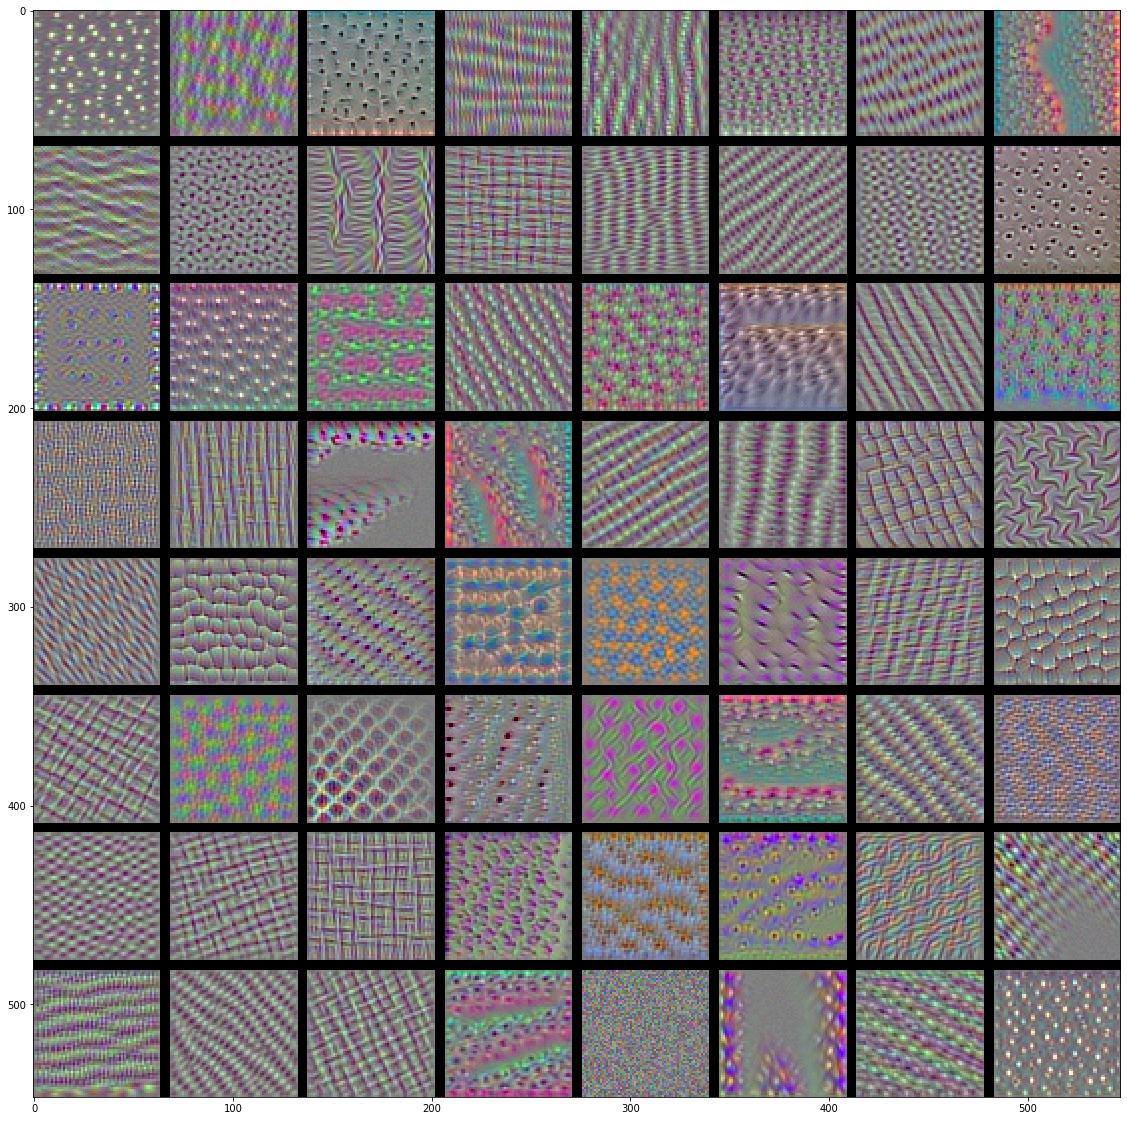

In [63]:
for layer_name in ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1']:
    size = 64
    margin = 5

    # 결과를 담을 빈 (검은) 이미지
    results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3), dtype='uint8')

    for i in range(8):  # results 그리드의 행을 반복합니다
        for j in range(8):  # results 그리드의 열을 반복합니다
            # layer_name에 있는 i + (j * 8)번째 필터에 대한 패턴 생성합니다
            filter_img = generate_pattern(layer_name, i + (j * 8), size=size)

            # results 그리드의 (i, j) 번째 위치에 저장합니다
            horizontal_start = i * size + i * margin
            horizontal_end = horizontal_start + size
            vertical_start = j * size + j * margin
            vertical_end = vertical_start + size
            results[horizontal_start: horizontal_end, vertical_start: vertical_end, :] = filter_img

    # results 그리드를 그립니다
    plt.figure(figsize=(20, 20))
    plt.imshow(results)
    plt.show()

이런 필터 시각화를 통해 컨브넷 층이 바라보는 방식을 이해할 수 있습니다. 컨브넷의 각 층은 필터의 조합으로 입력을 표현할 수 있는 일련의 필터를 학습합니다. 이는 푸리에 변환을 사용해 신호를 일련의 코사인 함수로 분해할 수 있는 것과 비슷합니다. 이 컨브넷 필터들은 모델의 상위 층으로 갈수록 점점 더 복잡해지고 개선됩니다.

모델에 있는 첫 번째 층(block1_conv1)의 필터는 간단한 대각선 방향의 에지와 색깔(또는 어떤 경우에 색깔이 있는 에지)을 인코딩합니다.
block2_conv1의 필터는 에지나 색깔의 조합으로 만들어진 간단한 질감을 인코딩합니다.
더 상위 층의 필터는 깃털, 눈, 나뭇잎 등과 같은 자연적인 이미지에서 찾을 수 있는 질감을 닮아가기 시작합니다.

## (2) Heatmap을 이용하여, 활성화된 Class(Category) 시각화

- Image의 어떤 부분이 해당 Convnet의 분류 결정에 기여하고 있는지를 시각적으로 확인하는데 유용한 예제 임
- 이를 이용하여 해당 Convnet을 이용한 분류 결정이 왜 잘못되어 있는지 사후 검토 해 볼 수 있음
- 또한 이미지에 특정 물체가 존재하는 위치를 파악할 수 있음
- 이러한 기법을 CAM(Class Activation Map)이라고 하고, 해당 점수 행렬을 Heatmap을 이용하여 시각화 함 
- [Grad-CAM: Visual Explanations from Deep Networks via Gradient-based Localization](https://arxiv.org/abs/1610.02391) 논문 참조

In [64]:
from keras.applications.vgg16 import VGG16
from keras import backend as K

K.clear_session()

# 지금까지는 상단의 Fully Connected Network는 제외하고 model을 생성했으나, 금번에는 모두 포함
model = VGG16(weights='imagenet')


553467904/553467096 [==============================] - 6s 0us/step


초원을 걷는 어미와 새끼 아프리카 코끼리의 이미지
![elephant](https://github.com/ikukang/DeepLearningWithPythonKeras/blob/master/image/datasets/creative_commons_elephant.jpg?raw=1)

In [0]:
# 해당 image를 VGG16 모델이 인식 할 수 있도록 다음의 전처리를 통해 변환 (크기 변환, 숫자 Type 변환)

from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

img_path = './creative_commons_elephant.jpg'

# 224 × 224 인 PIL(Python Image Labrary) image객체로 변환
img = image.load_img(img_path, target_size=(224, 224))

# 해당 image 객체를 (224 * 224 * 3) 인  numpy 텐서로 변환
x = image.img_to_array(img)

# VGG16에 주입하기 위해  차원을 추가하여 (1 *224 * 224 * 3) 텐서로 변환
x = np.expand_dims(x, axis=0)

# keras.applications.vgg16.preprocess_input Method를 이용하여 전처리 (Channel 별 Color 정규화)
x = preprocess_input(x)

In [66]:
# VGG16 모델 주입 후, 다음과 같이 African Elephant 일 가능성이 가장 높게 나타났음

preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=5)[0])

40960/35363 [==================================] - 0s 0us/step
Predicted: [('n02504458', 'African_elephant', 0.90942144), ('n01871265', 'tusker', 0.08618243), ('n02504013', 'Indian_elephant', 0.0043545677), ('n02408429', 'water_buffalo', 3.9944254e-05), ('n02397096', 'warthog', 1.3171782e-06)]


In [67]:
# VGG16 모델 주입 후 최종 결과 vector에서 최대 활성화 index를 확인
# 최종 결과 Vector는 VGG16으로 예측한 10000개 Object에 대한 일치 확률 임
np.argmax(preds[0])

386

### Grad-CAM 처리과정

In [0]:
# Grad-CAM(Class Activaton Map) 처리 과정

# African Elephant
african_elephant_output = model.output[:, 386]

# VGG16의 마지막 Convolution Layer인 block5_conv3 layer의 feature map
last_conv_layer = model.get_layer('block5_conv3')

# block5_conv3의 feature map 출력에 대한 African Elephant class의 gradient
grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]

# feature map channel 별 gradient 평균 값이 담긴 vector
pooled_grads = K.mean(grads, axis=(0, 1, 2))

# Sample image가 주어졌을 때  pooled_grads와 block5_conv3의 feature map 출력 구하기
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

# 해당 elephant sample image를 주입하고 2개의 numpy array를 받음
pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

# 해당 feature map에서 channel axis를 따라 평균한 값이 class activaton heat map
heatmap = np.mean(conv_layer_output_value, axis=-1)

In [69]:
# Heatmap을 0~1 사이 값으로 정규화한 최종 결과
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

In [70]:
# OpenCV를 사용해 heat map에 원본 image를 겹쳐 새로운 image 생성

import cv2

# cv2 모듈을 사용해 원본 이미지를 로드
img = cv2.imread(img_path)

# heatmap을 원본 이미지 크기에 맞게 변경
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

# heatmap을 RGB 포맷으로 변환
heatmap = np.uint8(255 * heatmap)

# 히트맵으로 변환
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

# 0.4는 히트맵의 강도
superimposed_img = heatmap * 0.4 + img

# 디스크에 이미지를 저장
cv2.imwrite('./elephant_cam.jpg', superimposed_img)

True

#### CV2 import를 위한 program 설치
위에서 openCV를 import 해야 하나, Ubuntu Linux에서는 설치하는 과정이 복잡한 편 임<br>
하기 Site를 참조하여 그대로 설치 시, 정상적으로 잘 설치 되었음 (총 소요시간 : 약 30분 이상)<br>
https://webnautes.tistory.com/1186

![elephant](https://github.com/ikukang/DeepLearningWithPythonKeras/blob/master/image/datasets/elephant_cam1.jpg?raw=1)